# 🔥 Simple Linear Regression — Weight vs Height (with Standardization)

## 📌 Problem Definition
We predict **Height (in cm)** based on **Weight (in kg)** using **Simple Linear Regression**.

The mathematical form of the model:
$$
y = \beta_0 + \beta_1 x + \varepsilon
$$

Where:
- $ y $ = Height  
- $ x $ = Weight  
- $ \beta_0 $ = Intercept  
- $ \beta_1 $ = Slope (how much height changes per 1kg change in weight)  
- $ \varepsilon $ = Error term (noise)

---

## 📊 Exploratory Data Analysis (EDA)
### 🔹 Scatter Plot
Used to visually check whether a linear relationship exists between Weight and Height.

### 🔹 Correlation
To quantify the strength of linear relationship:

$$
\text{corr}(X, y) = \frac{\text{Cov}(X, y)}{\sigma_X \sigma_y}
$$

A correlation closer to **+1** indicates a strong positive linear relationship.

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [323]:
# 1. Load the dataset
height_weight_data_set = pd.read_csv('height-weight.csv')

In [324]:
# Look at first 5 rows to verify data
display(height_weight_data_set.head())

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


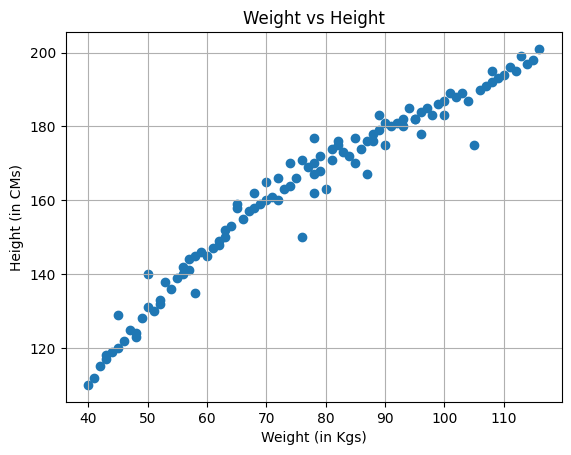

In [325]:
# 2. Scatter plot to visually inspect linear relationship
plt.scatter(height_weight_data_set['Weight'], height_weight_data_set['Height'])
plt.xlabel('Weight (in Kgs)')
plt.ylabel('Height (in CMs)')
plt.title('Weight vs Height')
plt.grid(True)
plt.show()

In [326]:
# 3. Correlation matrix to quantify linear relationship strength
print("Correlation matrix:")
print(height_weight_data_set.corr())

Correlation matrix:
          Weight    Height
Weight  1.000000  0.970643
Height  0.970643  1.000000


### 🔹 Pairplot (Seaborn)
Shows:
- Distribution of each variable  
- Pairwise scatter plots  


## 📦 Feature Selection
- **Independent Feature (X)** → Weight  
  $$\
  X = \text{Weight}
  $$
- **Dependent Feature (y)** → Height  
  $$
  y = \text{Height}
  $$

**Important:**  
$ X $ must be **2D** (DataFrame), shape: $ (n, 1) $  
$ y $ is **1D** (Series), shape: $ (n,) $



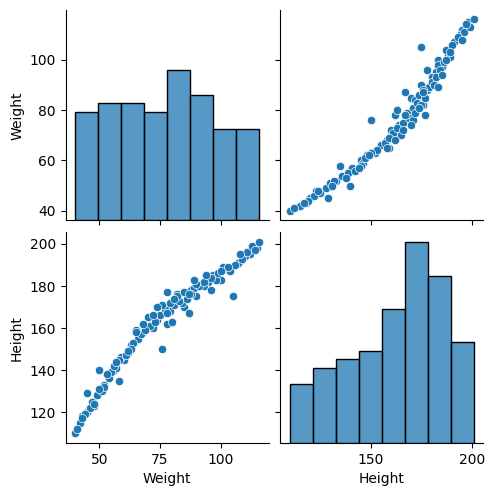

In [327]:
# 4. Seaborn pairplot for quick EDA (distributions + relationships)
import seaborn as sns
sns.pairplot(height_weight_data_set)
plt.show()

In [328]:
# =========================
# Step 1: Features Selection
# =========================

# Independent feature (X) must be 2D: DataFrame or 2D array
X = height_weight_data_set[['Weight']]   # shape: (n_samples, 1)
# Dependent feature (y) can be 1D: Series or 1D array
y = height_weight_data_set['Height']     # shape: (n_samples,)

print(f"Shape of Independent feature X --> {np.array(X).shape}")
print(f"Shape of Dependent feature y --> {np.array(y).shape}")

Shape of Independent feature X --> (109, 1)
Shape of Dependent feature y --> (109,)


## 🧪 Train–Test Split
Dataset split:  
$$
75\% \text{ Training Data} \quad 25\% \text{ Testing Data}
$$

Training set → used to learn model parameters  
Test set → used to evaluate model performance on unseen data

In [329]:
# =====================
# Train–Test Split
# =====================
from sklearn.model_selection import train_test_split

# Split data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (81, 1)
Shape of X_test: (28, 1)
Shape of y_train: (81,)
Shape of y_test: (28,)


# 🧮 Standardization with `StandardScaler`

### 🔥 Standardization Formula
$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $ x $ = original feature value  
- $ \mu $ = mean of the feature (training set only)  
- $ \sigma $ = standard deviation (training set only)  

After scaling:
- Mean becomes ≈ 0  
- Standard deviation becomes ≈ 1  

### ❗ Why Standardization is used
| Reason | Benefit |
|--------|---------|
| Numerical stability | Prevents large-scale numerical values |
| Consistency across features | Makes coefficients more comparable |
| Required when using regularization | Ridge / Lasso require scaled features |
| Good practice | Model pipelines handle future data correctly |

Even though simple linear regression *can work without scaling*, **scaling becomes essential once multiple features or regularization are added**.

## 1. What is Standardization?

Standardization is a preprocessing step where we transform a feature so that it has:

- **Mean** ≈ 0  
- **Standard Deviation** ≈ 1  

For each original value $ x $, the standardized value $ z $ is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- $ \mu $ = mean of the feature (computed from the **training data**)  
- $ \sigma $ = standard deviation of the feature (from **training data**)  

This is also called **z-score normalization**.

---

## 2. What does StandardScaler do in scikit-learn?

In scikit-learn:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
## 🔹 `fit(X_train)` step

During the `fit` phase of `StandardScaler`, the scaler **learns the properties of the training feature**:

$$
\mu = \text{mean}(X_{\text{train}})
$$
$$
\sigma = \text{std}(X_{\text{train}})
$$

Both are computed **only from the training data** (not the test data).

These values are stored inside the scaler as:

- `scaler.mean_` → mean of the feature
- `scaler.scale_` → standard deviation of the feature

After the `fit` step, the scaler now knows **how to transform the Weight feature correctly**.

---

## 🔹 `transform(X)` step

Once the scaler is fitted, `transform` converts the raw values into **standardized values (z-scores)**:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $ x $ = original weight value
- $ \mu $ = mean of training weight
- $ \sigma $ = standard deviation of training weight

This transformation is applied to:
- `X_train` → using `fit_transform()`
- `X_test` → using `transform()` **only**
- New/unseen data → using `transform()` **only**

We **never** call `fit()` on test data or new data because that would leak information.

---

## 🔥 Why must we apply scaler in this order?

| Dataset | Operation | Reason |
|---------|-----------|--------|
| Training data | `fit_transform()` | Learn μ and σ, then scale the data |
| Test data | `transform()` | Scale using μ and σ learned from training |
| New prediction data | `transform()` | Must be on the same scale as training |

If we `fit()` on test data, we **accidentally give the model information from the test set**, causing **data leakage**.

---

## 📌 Numerical Example (for intuition)

Assume the **training dataset mean and std dev for Weight** are:

$$
\mu = 70,\quad \sigma = 12
$$

For a sample weight:

$$
x = 94
$$

The scaled value becomes:

$$
z = \frac{94 - 70}{12} = 2
$$

Meaning: **94 kg is 2 standard deviations above the mean.**

---

## 📌 How predictions work after scaling

The regression model learns on standardized weight:

$$
\hat{y} = \beta_0 + \beta_1 z
$$

But \( z \) is computed from:

$$
z = \frac{x - \mu}{\sigma}
$$

So a real prediction for new weight $ x $ is:

$$
\hat{y} = \beta_0 + \beta_1 \left(\frac{x - \mu}{\sigma}\right)
$$

Even though features are scaled internally, the final output predicted height remains in **centimeters** — no scaling is applied to $ y $.

---

## 🧠 Key Takeaways

- `fit()` → calculate mean & std from **training** data  
- `transform()` → apply scaling to **train, test, and new** data using the same μ & σ  
- Never `fit()` on test data → prevents **data leakage**  
- Scaling makes ML training more **stable, consistent, and fair** across features  


In [330]:
# =====================
# Standardization
# =====================
from sklearn.preprocessing import StandardScaler

# Standardize ONLY the input features (X), not the target (y)
# This transforms Weight into z-scores: (x - mean) / std
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train, transform train
X_test_scaled = scaler.transform(X_test)         # transform test with same params

## 📈 Training the Linear Regression Model

The model learns:
$$
\beta_1 = \text{Slope} \quad \text{and} \quad \beta_0 = \text{Intercept}
$$

OLS (Ordinary Least Squares) minimizes:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Closed-form solution:
$$
\boldsymbol{\beta} = (X^\top X)^{-1} X^\top y
$$


In [331]:
# ==========================
# Simple Linear Regression
# ==========================
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Coefficient or Slope (β₁): {model.coef_[0]:.4f}")
print(f"Intercept (β₀): {model.intercept_:.4f}")

Coefficient or Slope (β₁): 23.0210
Intercept (β₀): 162.9136


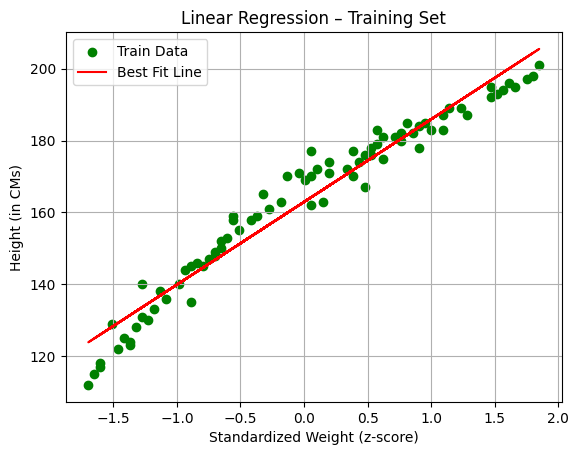

In [332]:
# ==========================
# Plot: Training Data + Best Fit Line
# Note: X_train_scaled is standardized, not raw weight.
# ==========================
plt.scatter(X_train_scaled, y_train, color='green', label='Train Data')
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red', label='Best Fit Line')
plt.xlabel("Standardized Weight (z-score)")
plt.ylabel("Height (in CMs)")
plt.title('Linear Regression – Training Set')
plt.legend()
plt.grid(True)
plt.show()

## 🎯 Model Evaluation Metrics

### 🔹 Mean Squared Error (MSE)
$$
\text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

### 🔹 Mean Absolute Error (MAE)
$$
\text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i|
$$

### 🔹 Root Mean Squared Error (RMSE)
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

### 🔹 $ R^2 $ — Coefficient of Determination
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

$$
\text{SSR} = \sum (y_i - \hat{y}_i)^2 \quad \text{and} \quad
\text{SST} = \sum (y_i - \bar{y})^2
$$

### 🔹 Adjusted $ R^2 $
$$
\bar{R}^2 = 1 - (1 - R^2)\,\frac{n - 1}{n - p - 1}
$$
Where:
- $ n $ = number of samples  
- $ p $ = number of predictors  

In [333]:
# ==========================
# Prediction on Test Data
# ==========================
y_pred = model.predict(X_test_scaled)

# ==========================
# Performance Metrics
# ==========================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

R² Score: 0.9150
MSE : 43.9947
MAE : 5.1843
RMSE : 6.6328


In [334]:
# ==========================
# Adjusted R²
# ==========================
# n = number of samples in test set
# p = number of predictors (here p = 1)
n = len(y_test)
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")

Adjusted R²: 0.9117


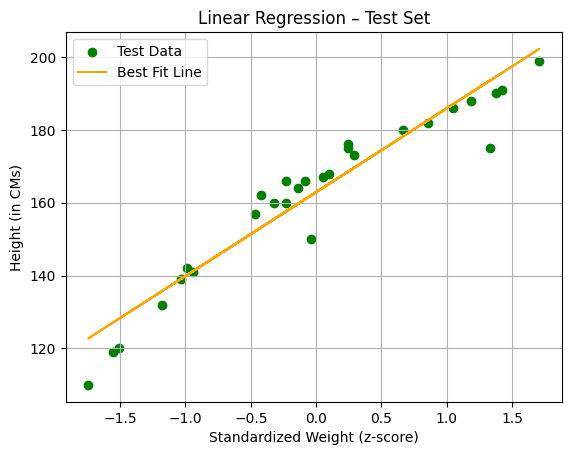

In [335]:
# ==========================
# Plot: Test Data + Best Fit Line
# (Use standardized X_test for prediction line)
# ==========================
plt.scatter(X_test_scaled, y_test, color='green', label='Test Data')
plt.plot(X_test_scaled, y_pred, color='orange', label='Best Fit Line')
plt.xlabel("Standardized Weight (z-score)")
plt.ylabel("Height (in CMs)")
plt.title('Linear Regression – Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [336]:
# ==========================
# OLS Linear Regression with statsmodels
# ==========================
import statsmodels.api as sm

# statsmodels does NOT add intercept by default, so add constant manually
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

ols_model = sm.OLS(y_train, X_train_ols).fit()
ols_predictions = ols_model.predict(X_test_ols)

# Detailed statistical summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1527.
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.97e-53
Time:                        20:35:44   Log-Likelihood:                -249.04
No. Observations:                  81   AIC:                             502.1
Df Residuals:                      79   BIC:                             506.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.9136      0.589    276.520      0.0

## 🔮 Predicting New Data

To predict height for a new weight:

1️⃣ Convert weight into the same format as training data  
2️⃣ Apply **same scaler**  
3️⃣ Use the trained model to predict:

$$
\hat{y}_{\text{new}} = \beta_0 + \beta_1 z_{\text{new}}
$$

Where $ z_{\text{new}} $ is the standardized weight.

In [337]:
# ==========================
# Predict for New Data
# ==========================
# Example: Predict height for Weight = 72 kg
new_data = pd.DataFrame([[72]], columns=['Weight'])

# Important: apply SAME scaler to new data
new_data_scaled = scaler.transform(new_data)

new_prediction = model.predict(new_data_scaled)
print(f"Predicted height for 72 kg: {new_prediction[0]:.2f} cm")

Predicted height for 72 kg: 157.61 cm


## 🚀 Key Takeaways

| Concept | Importance |
|--------|------------|
| Scatter plot | Confirms linear relationship visually |
| Correlation | Quantifies linear relationship |
| Train-Test Split | Prevents overfitting |
| StandardScaler | Required for stable ML pipelines |
| Regression line | Shows best linear fit |
| Metrics | Measure model performance |
| Adjusted \( R^2 \) | Useful when multiple predictors exist |